In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
from numpy import mean
from numpy import std

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
df = pd.read_csv('G:/New 20121 Dekstop Files/thesis 2021/employee attrition dataset/employee_attrition1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  Quit_in_3_Years           1470 non-null   int64 
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [4]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
Quit_in_3_Years: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique

# 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [6]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

In [7]:
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

# Categorical Features

In [8]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [9]:
df['Attrition'].replace({'Yes':1,'No':0},inplace = True)

# Numerical Features

In [10]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
Quit_in_3_Years : [1 0]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
OverTime : [1 0]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [11]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


# 📉 Visualization of Categorical Features

In [12]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
plt.show()

F:\New_Anaconda_Inst_Loc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


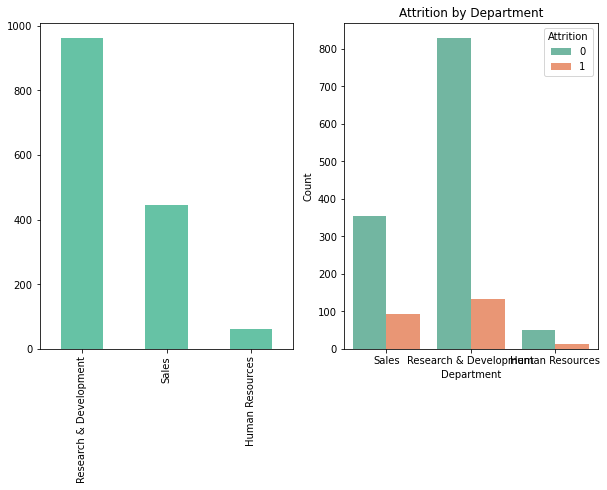

In [13]:
categorical_column_viz('Department')

# 📉 Visualization of Numerical Features

In [14]:
def numerical_column_viz(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayed', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set3', ax=ax[1])

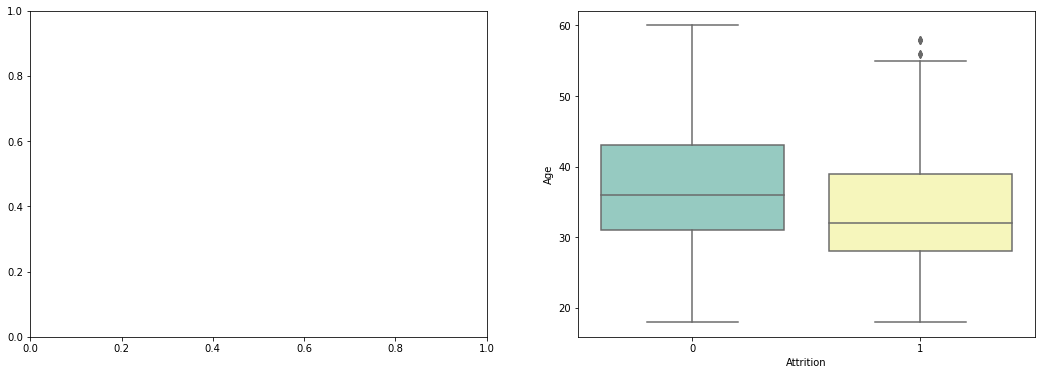

In [15]:
numerical_column_viz("Age")

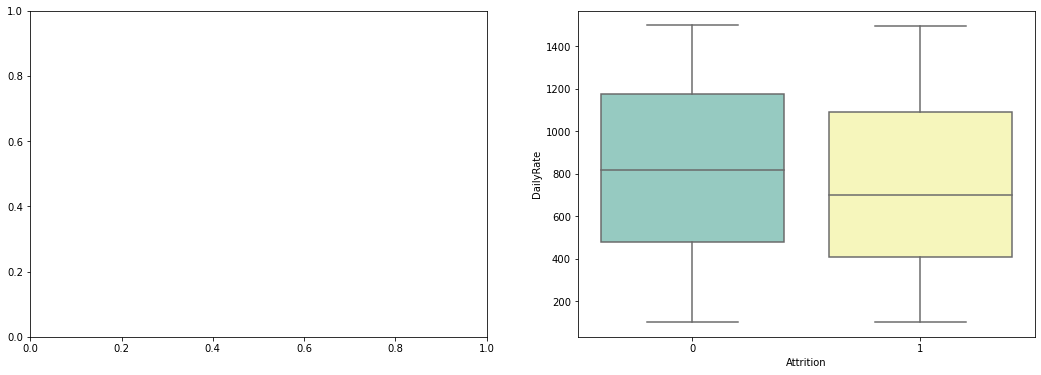

In [16]:
numerical_column_viz("DailyRate")

# Assign a new column named Total_Satisfaction

In [17]:
df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] + 
                            df['JobInvolvement'] + 
                            df['JobSatisfaction'] + 
                            df['RelationshipSatisfaction'] +
                            df['WorkLifeBalance']+
                            df['YearsWithCurrManager']+
                            df['YearsInCurrentRole']) /7 

# Drop Columns
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance','YearsWithCurrManager','YearsInCurrentRole'], axis=1, inplace=True)

In [18]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,Quit_in_3_Years,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,Total_Satisfaction
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,1,...,8,1,11,3,0,8,0,6,0,2.857143
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,1,...,1,0,23,4,1,10,3,10,1,4.000000
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,Male,1,...,6,1,15,3,0,7,3,0,0,2.000000
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,1,...,1,1,11,3,0,8,3,8,3,3.285714
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,Male,1,...,9,0,12,3,1,6,3,2,2,2.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,Male,1,...,4,0,17,3,1,17,3,5,0,3.142857
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,Male,1,...,4,0,15,3,1,9,5,7,1,3.571429
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,Male,1,...,1,1,20,4,1,6,0,6,0,2.571429
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,Male,1,...,2,0,14,3,0,17,3,9,0,4.000000


In [19]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}\n') 

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: ['Sales' 'Research & Development' 'Human Resources']

EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: ['Female' 'Male']

JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus: ['Single' 'Married' 'Divorced']



In [20]:
for column in df:
    if df[column].dtypes!='object':
        print(f'{column}: {df[column].unique()}\n') 

Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Attrition: [1 0]

DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1

# Feature visualization with count number

In [21]:
def feature_visualization(name):
    sns.set(style="darkgrid")
    sns.set_palette("hls", 3)
    fig, ax = plt.subplots(figsize=(20,9))
    ax = sns.countplot(x=name, hue="Attrition", data=df)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:0.0f}'.format(height),
                ha="center")  

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


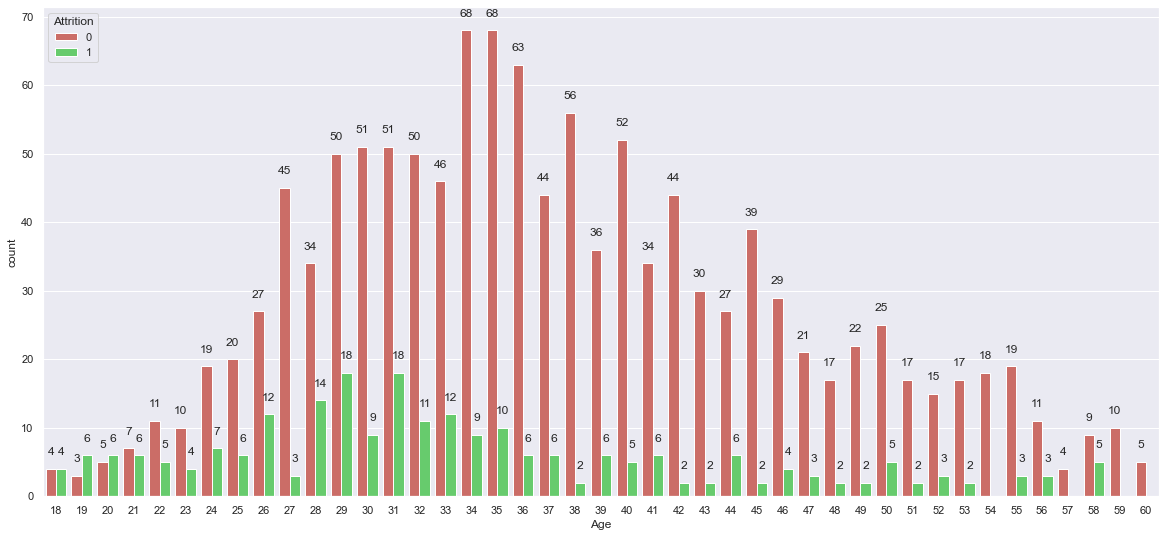

In [22]:
feature_visualization('Age')

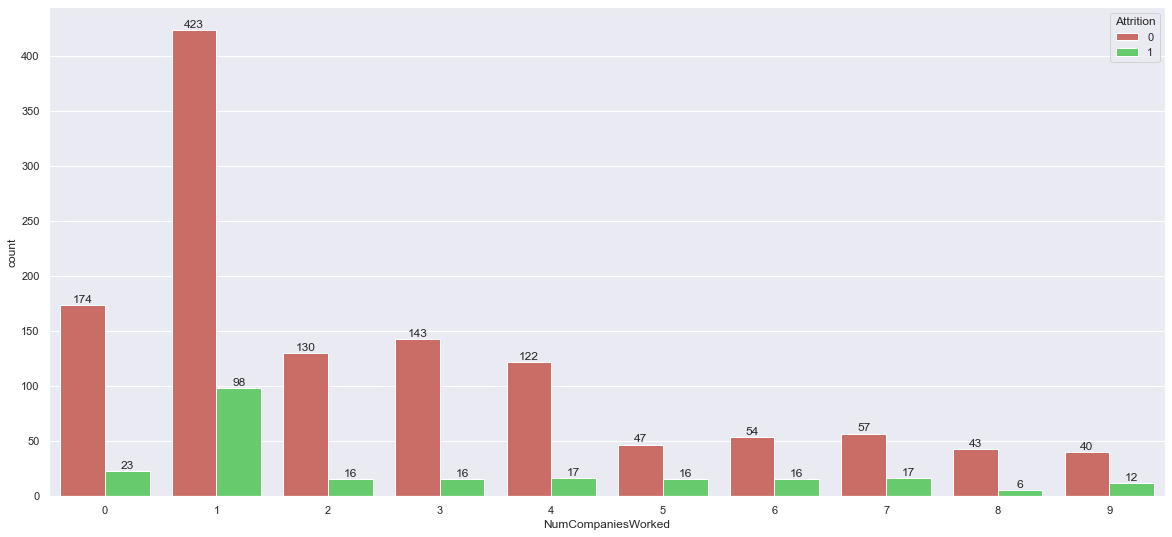

In [23]:
feature_visualization('NumCompaniesWorked')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


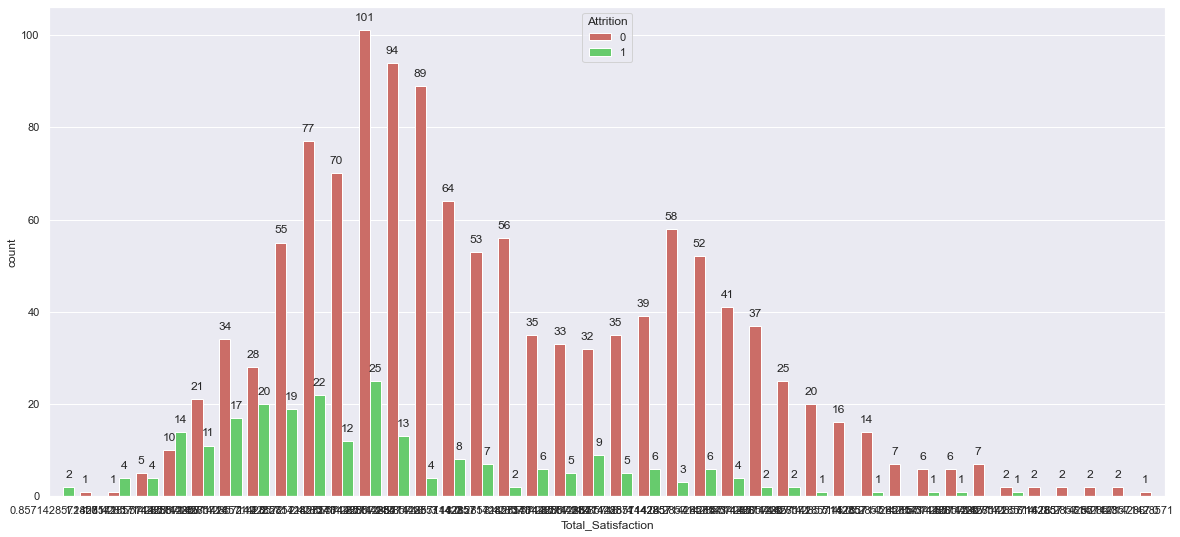

In [24]:
feature_visualization('Total_Satisfaction')

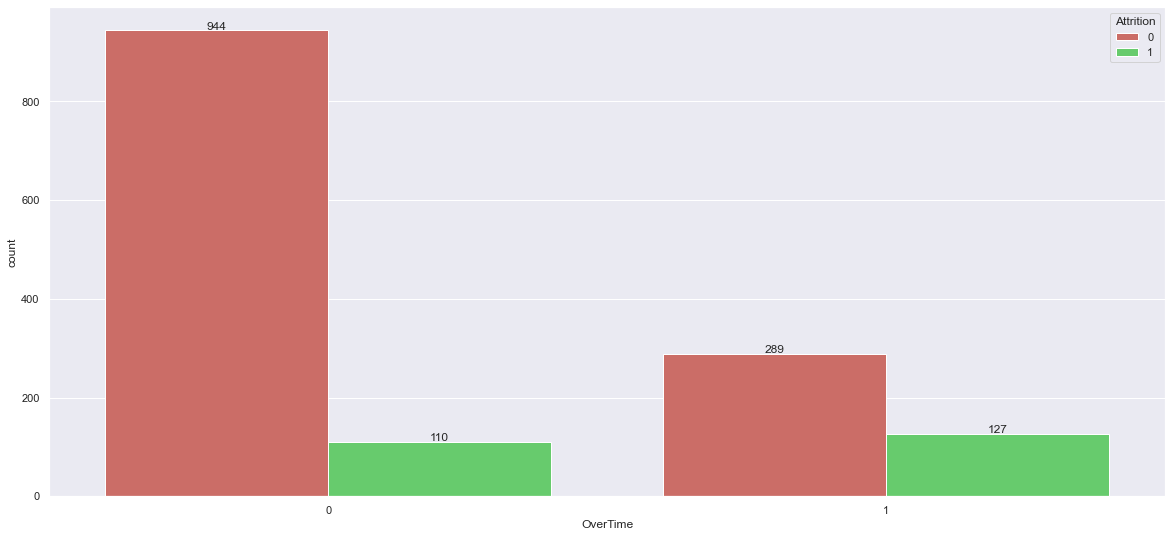

In [25]:
feature_visualization('OverTime')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


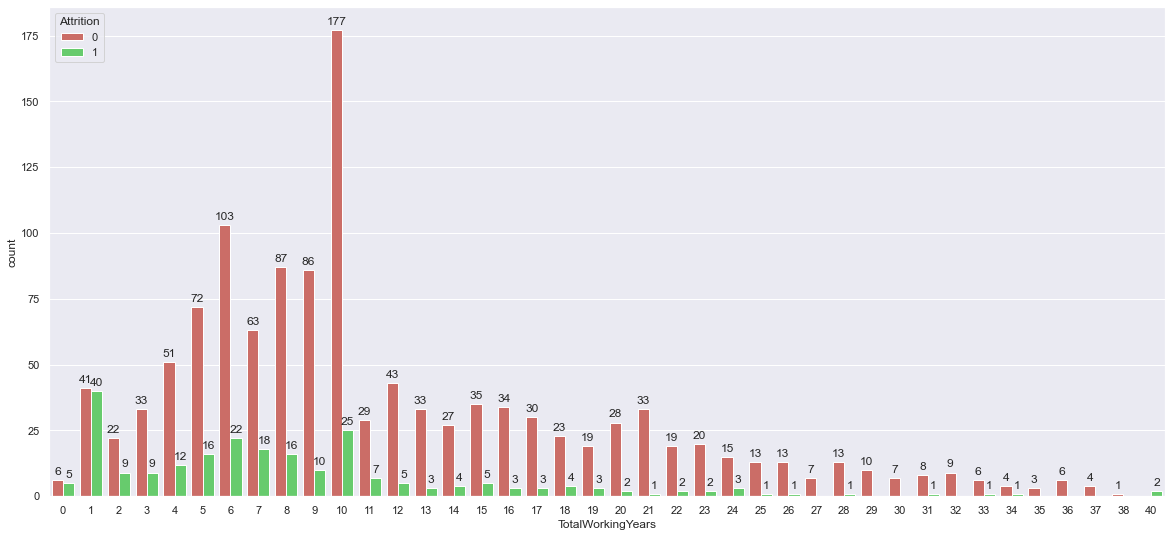

In [26]:
feature_visualization('TotalWorkingYears')

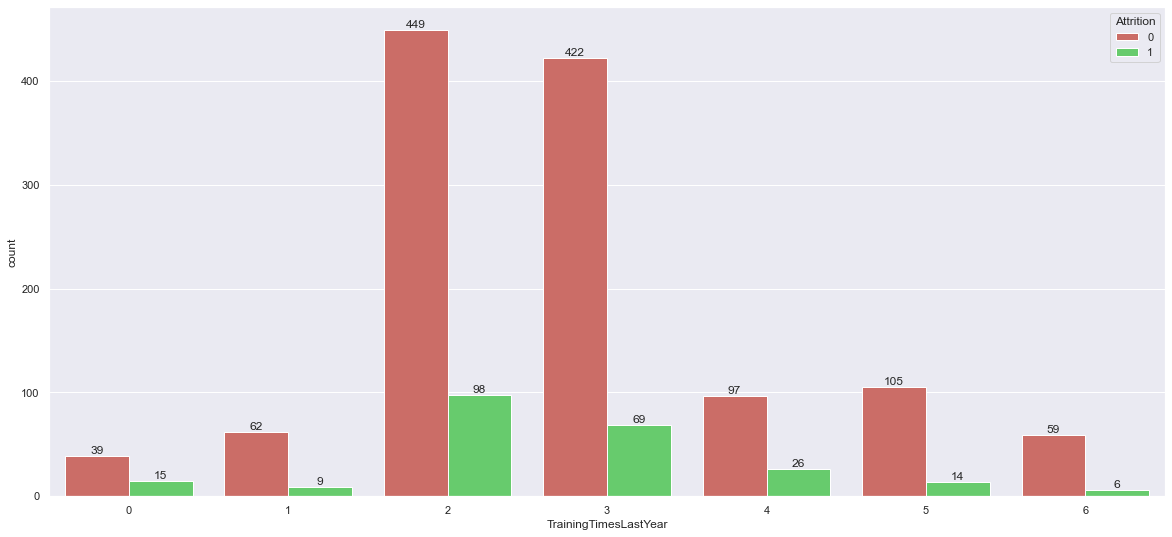

In [27]:
feature_visualization('TrainingTimesLastYear')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


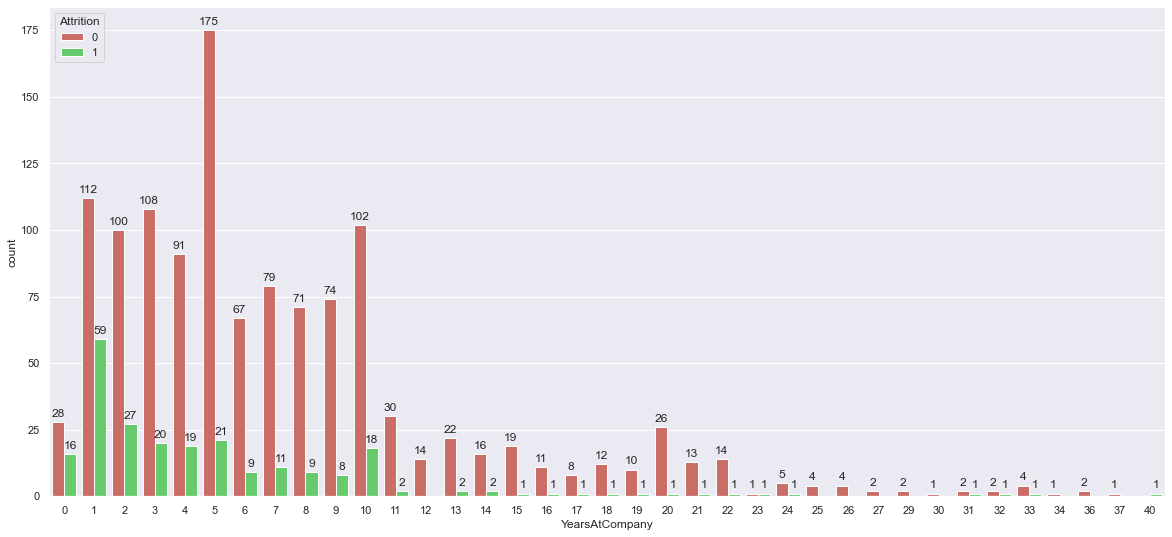

In [28]:
feature_visualization('YearsAtCompany')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


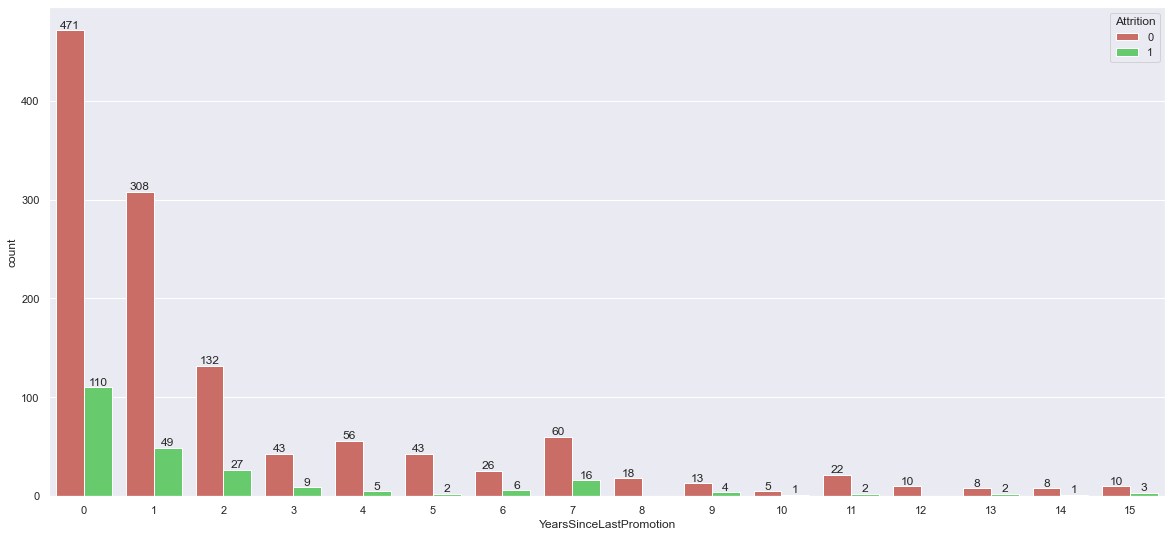

In [29]:
feature_visualization('YearsSinceLastPromotion')

# label Encoding

In [31]:
label_encoder =  preprocessing.LabelEncoder()
for column in df:
    if df[column].dtypes=='object':  
        df[column] = label_encoder.fit_transform(df[column])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int32  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int32  
 5   DistanceFromHome         1470 non-null   int64  
 6   Education                1470 non-null   int64  
 7   EducationField           1470 non-null   int32  
 8   Gender                   1470 non-null   int32  
 9   Quit_in_3_Years          1470 non-null   int64  
 10  HourlyRate               1470 non-null   int64  
 11  JobLevel                 1470 non-null   int64  
 12  JobRole                  1470 non-null   int32  
 13  MaritalStatus            1470 non-null   int32  
 14  MonthlyIncome           

In [33]:
x = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

In [34]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,Quit_in_3_Years,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,Total_Satisfaction
0,41,2,1102,2,1,2,1,0,1,94,...,8,1,11,3,0,8,0,6,0,2.857143
1,49,1,279,1,8,1,1,1,1,61,...,1,0,23,4,1,10,3,10,1,4.000000
2,37,2,1373,1,2,2,4,1,1,92,...,6,1,15,3,0,7,3,0,0,2.000000
3,33,1,1392,1,3,4,1,0,1,56,...,1,1,11,3,0,8,3,8,3,3.285714
4,27,2,591,1,2,1,3,1,1,40,...,9,0,12,3,1,6,3,2,2,2.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,1,41,...,4,0,17,3,1,17,3,5,0,3.142857
1466,39,2,613,1,6,1,3,1,1,42,...,4,0,15,3,1,9,5,7,1,3.571429
1467,27,2,155,1,4,3,1,1,1,87,...,1,1,20,4,1,6,0,6,0,2.571429
1468,49,1,1023,2,2,3,3,1,1,63,...,2,0,14,3,0,17,3,9,0,4.000000


In [35]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Working with 27 columns

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=43, stratify=y)

# RF

In [37]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=100, random_state=50)

In [38]:
rnf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=50)

In [39]:
# Accuracy on Training 
predictions_train = rnf.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.9991496598639455

Testing Accuracy :  0.8707482993197279


# LR

In [40]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(xtrain,ytrain)

F:\New_Anaconda_Inst_Loc\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Accuracy on Training 
predictions_train = lrmodel.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = lrmodel.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8401360544217688

Testing Accuracy :  0.8401360544217688


# XGBoost

In [42]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(xtrain,ytrain)
predictions_train =classifier.predict(xtrain)
acc=accuracy_score(ytrain, predictions_train)
print('\nTraining Accuracy :', acc)
predictions_test = classifier.predict(xtest)
accc=accuracy_score(ytest, predictions_test)
print('\nTesting Accuracy :', accc)

F:\New_Anaconda_Inst_Loc\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training Accuracy : 1.0

Testing Accuracy : 0.8775510204081632


# Drop the following columns 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion' as new column 'Quit_in_3_Year' is created

In [43]:
x = df.drop(['Attrition','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion'],axis = 1)
y = df['Attrition']

In [44]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,Quit_in_3_Years,HourlyRate,...,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,Total_Satisfaction
0,41,2,1102,2,1,2,1,0,1,94,...,7,2,5993,19479,1,11,3,0,0,2.857143
1,49,1,279,1,8,1,1,1,1,61,...,6,1,5130,24907,0,23,4,1,3,4.000000
2,37,2,1373,1,2,2,4,1,1,92,...,2,2,2090,2396,1,15,3,0,3,2.000000
3,33,1,1392,1,3,4,1,0,1,56,...,6,1,2909,23159,1,11,3,0,3,3.285714
4,27,2,591,1,2,1,3,1,1,40,...,2,1,3468,16632,0,12,3,1,3,2.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,1,41,...,2,1,2571,12290,0,17,3,1,3,3.142857
1466,39,2,613,1,6,1,3,1,1,42,...,0,1,9991,21457,0,15,3,1,5,3.571429
1467,27,2,155,1,4,3,1,1,1,87,...,4,1,6142,5174,1,20,4,1,0,2.571429
1468,49,1,1023,2,2,3,3,1,1,63,...,7,1,5390,13243,0,14,3,0,3,4.000000


# Working with 22 columns

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=43, stratify=y)

# RF

In [46]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=50, random_state=50)

In [47]:
rnf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=50, random_state=50)

In [48]:
# Accuracy on Training 
predictions_train = rnf.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.9991496598639455

Testing Accuracy :  0.8877551020408163


# XGBoost

In [49]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(xtrain,ytrain)
predictions_train =classifier.predict(xtrain)
acc=accuracy_score(ytrain, predictions_train)
print('\nTraining Accuracy :', acc)
predictions_test = classifier.predict(xtest)
accc=accuracy_score(ytest, predictions_test)
print('\nTesting Accuracy :', accc)

F:\New_Anaconda_Inst_Loc\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training Accuracy : 1.0

Testing Accuracy : 0.8877551020408163


# Using StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

# XGBoost

In [51]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(xtrain,ytrain)
predictions_train =classifier.predict(xtrain)
acc=accuracy_score(ytrain, predictions_train)
print('\nTraining Accuracy :', acc)
predictions_test = classifier.predict(xtest)
accc=accuracy_score(ytest, predictions_test)
print('\nTesting Accuracy :', accc)

F:\New_Anaconda_Inst_Loc\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training Accuracy : 1.0

Testing Accuracy : 0.8877551020408163


# RandomForestClassifier

In [52]:
rnf = RandomForestClassifier(n_estimators=30, random_state=50)
rnf.fit(xtrain,ytrain)
# Accuracy on Training 
predictions_train = rnf.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.9931972789115646

Testing Accuracy :  0.891156462585034


# KNeighborsClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=25)

In [54]:
# Accuracy on Training 
predictions_train = classifier.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = classifier.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8409863945578231

Testing Accuracy :  0.8401360544217688


# SVM Model

In [55]:
svm_model = SVC(C=2, gamma = 'auto',kernel ='rbf')
svm_model.fit(xtrain,ytrain)

SVC(C=2, gamma='auto')

In [56]:
# Accuracy on Training 
predictions_train = svm_model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = svm_model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.9175170068027211

Testing Accuracy :  0.8809523809523809


# light gbm

In [57]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.07,max_depth=-4,random_state=2021)
model.fit(xtrain,ytrain,eval_set=[(xtest,ytest),(xtrain,ytrain)],
          verbose=15,eval_metric='logloss')

[15]	training's binary_logloss: 0.279283	valid_0's binary_logloss: 0.348438
[30]	training's binary_logloss: 0.199723	valid_0's binary_logloss: 0.322031
[45]	training's binary_logloss: 0.14238	valid_0's binary_logloss: 0.319712
[60]	training's binary_logloss: 0.104338	valid_0's binary_logloss: 0.322517
[75]	training's binary_logloss: 0.0775709	valid_0's binary_logloss: 0.326391
[90]	training's binary_logloss: 0.0576974	valid_0's binary_logloss: 0.331701


F:\New_Anaconda_Inst_Loc\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.07, max_depth=-4, random_state=2021)

In [58]:
print('Training accuracy {:.4f}'.format(model.score(xtrain,ytrain)))
print('Testing accuracy {:.4f}'.format(model.score(xtest,ytest)))

Training accuracy 1.0000
Testing accuracy 0.8810


# linear SVM

In [59]:
svm_model = SVC(kernel='linear',gamma = 'auto')
svm_model.fit(xtrain,ytrain)

SVC(gamma='auto', kernel='linear')

In [60]:
# Accuracy on Training 
predictions_train = svm_model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = svm_model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8384353741496599

Testing Accuracy :  0.8401360544217688


# Catboost

In [61]:
from catboost import CatBoostClassifier
catmodel = CatBoostClassifier(iterations=100,learning_rate=0.5)
catmodel.fit(xtrain,ytrain,plot=False)

0:	learn: 0.4696316	total: 406ms	remaining: 40.2s
1:	learn: 0.3552262	total: 415ms	remaining: 20.4s
2:	learn: 0.3214456	total: 424ms	remaining: 13.7s
3:	learn: 0.2954924	total: 433ms	remaining: 10.4s
4:	learn: 0.2830418	total: 442ms	remaining: 8.39s
5:	learn: 0.2705930	total: 450ms	remaining: 7.06s
6:	learn: 0.2623701	total: 456ms	remaining: 6.06s
7:	learn: 0.2586751	total: 460ms	remaining: 5.29s
8:	learn: 0.2499297	total: 464ms	remaining: 4.7s
9:	learn: 0.2378554	total: 468ms	remaining: 4.21s
10:	learn: 0.2272561	total: 472ms	remaining: 3.82s
11:	learn: 0.2189681	total: 476ms	remaining: 3.49s
12:	learn: 0.2142838	total: 480ms	remaining: 3.21s
13:	learn: 0.2047957	total: 484ms	remaining: 2.97s
14:	learn: 0.1969284	total: 488ms	remaining: 2.77s
15:	learn: 0.1868251	total: 492ms	remaining: 2.58s
16:	learn: 0.1785208	total: 496ms	remaining: 2.42s
17:	learn: 0.1697624	total: 500ms	remaining: 2.28s
18:	learn: 0.1536060	total: 503ms	remaining: 2.15s
19:	learn: 0.1443694	total: 508ms	remainin

In [62]:
# Accuracy on Training 
predictions_train = catmodel.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = catmodel.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  1.0

Testing Accuracy :  0.891156462585034


# Adaboost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
# Adaboost
abc = AdaBoostClassifier(n_estimators=100, learning_rate=.1)
model = abc.fit(xtrain, ytrain)

# Accuracy on Training 
predictions_train = model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8622448979591837

Testing Accuracy :  0.8707482993197279


# Stochastic Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
# Stochastic Gradient Boosting
model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)

# Accuracy on Training 
predictions_train = model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9379251700680272

Testing Accuracy :  0.8877551020408163
Mean Accuracy: 0.864 (0.017)


# Bagging classifier

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 50
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,n_estimators = num_trees, max_samples =.5 , max_features = 1.0, random_state = 2021)

model.fit(xtrain,ytrain)
# Accuracy on Training 
predictions_train = model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9498299319727891

Testing Accuracy :  0.8741496598639455
Accuracy: 0.861 (0.023)


In [69]:
print('xtrain: ',xtrain.shape)
print('xtest: ',xtest.shape)

xtrain:  (1176, 21)
xtest:  (294, 21)


In [74]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(xtrain, ytrain)

In [75]:
print('x_train_SMOTE: ',X_train_SMOTE.shape)
print('y_train_SMOTE: ',y_train_SMOTE.shape)

x_train_SMOTE:  (1972, 21)
y_train_SMOTE:  (1972,)


In [77]:
rnf = RandomForestClassifier(n_estimators=30, random_state=50)
rnf.fit(X_train_SMOTE,y_train_SMOTE)
# Accuracy on Training 
pred = rnf.predict(X_train_SMOTE)
accuracy_score(y_train_SMOTE,pred)

0.9994929006085193

In [78]:
predictions_test = rnf.predict(xtest)
accuracy_score(ytest,predictions_test)

0.8741496598639455

In [79]:
report = classification_report(ytest,predictions_test)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       247
           1       0.85      0.36      0.51        47

    accuracy                           0.89       294
   macro avg       0.87      0.67      0.72       294
weighted avg       0.88      0.89      0.87       294



<AxesSubplot:>

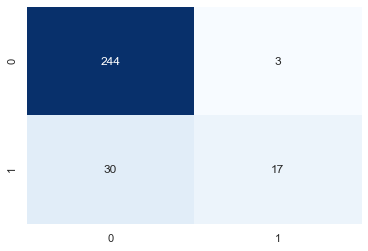

In [80]:
cm = confusion_matrix(ytest,predictions_test)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [82]:
pd.crosstab(pd.Series(predictions_test, name = 'Predicted'), 
            pd.Series(ytest, name = 'Actual'))

Actual,0,1
Predicted,,
0,49,7
1,3,0
